<a href="https://colab.research.google.com/github/rallyfranky/my-first-repo/blob/main/%E6%A9%9F%E4%BC%9A%E5%AD%A6%E7%BF%92%E8%A8%93%E7%B7%B4%E7%AC%AC%EF%BC%93%E7%AB%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ライブラリを用いたパーセプトロン

In [20]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[:,[2,3]]
y=iris.target
print(np.unique(y))

[0 1 2]


In [21]:
X

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [22]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)#テストデータ:訓練データ=3:7、乱数シード1、層化サンプリングON

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [25]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

In [26]:
y_pred = ppn.predict(X_test_std)

print('誤分類サンプル数は： %d' % (y_test != y_pred).sum())

誤分類サンプル数は： 1


In [27]:
from sklearn.metrics import accuracy_score
print("Accuracy is: %.3f" % accuracy_score(y_test, y_pred))

Accuracy is: 0.978


In [28]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_region(X, y, classifier, test_idx=None, resolution=0.02):
#マーカーとカラーマップ準備#
  markers = ('s','x','o','v')
  colors = ('red','blue','lightgreen','gray','cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])
#領域展開#
  x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1
  x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1
#グリッド点の生成#
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),np.arange(x2_min, x2_max, resolution))
#特徴量を一元配置にして予測実行#
  Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)

  Z = Z.reshape(xx1.shape)

  plt.contourf(xx1,xx2,Z,alpha=0.3,cmap=cmap)
  plt.xlim(xx1.min(),xx1.max())
  plt.ylim(xx2.min(),xx2.max())
#クラス毎に訓練データをプロット#
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y==cl,0],y=X[y==cl,1],alpha=0.8,c=colors[idx],marker=markers[idx],label=cl,edgecolor='black')


    if test_idx:
      X_test, y_test = X[test_idx, :],y[test_idx]
      plt.scatter(X_test[:, 0],X_test[:, 1], c='', edgecolor='black', alpha=1.0, linewidth=1,marker='o',s=100,label='test_set')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


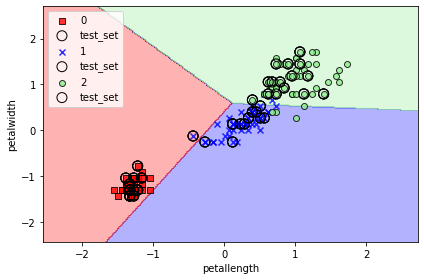

In [29]:
X_combined_std = np.vstack((X_train_std,X_test_std))
y_combined = np.hstack((y_train,y_test))
plot_decision_region(X=X_combined_std,y=y_combined,classifier=ppn,test_idx=range(105,150))
plt.xlabel('petallength')
plt.ylabel('petalwidth')
plt.legend()
plt.tight_layout()
plt.show()

シグモイド＆ロジスティック回帰

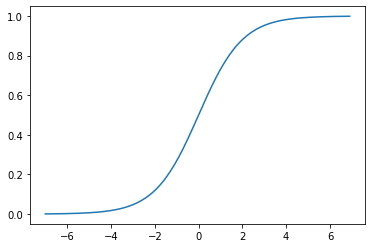

In [30]:
#シグモイドの実装
def sigmoid(z):
  return 1.0/(1.0 + np.exp(-z))

z=np.arange(-7,7,0.1)

phi_z = sigmoid(z)

plt.plot(z,phi_z)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


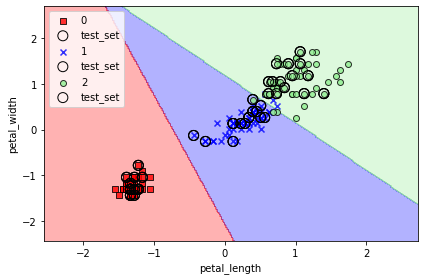

In [31]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100.0,#正則化パラメータ
                        random_state=1,#シード
                        solver='lbfgs',#最適化アルゴリズム
                        multi_class='ovr')#多クラス分類

lr.fit(X_train_std, y_train)

plot_decision_region(X_combined_std, y_combined, classifier=lr,test_idx=range(105,150))
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.legend()
plt.tight_layout()
plt.show()

In [32]:
y_pred = lr.predict(X_test_std)
print('accuracy is %.3F' % accuracy_score(y_pred, y_test))
print('sum of misclassify is %d' % (y_test != y_pred).sum())

accuracy is 0.978
sum of misclassify is 1


In [33]:
lr.predict_proba(X_test_std[:3,:])

array([[3.81527885e-09, 1.44792866e-01, 8.55207131e-01],
       [8.34020679e-01, 1.65979321e-01, 3.25737138e-13],
       [8.48831425e-01, 1.51168575e-01, 2.62277619e-14]])

SVCによる分類

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


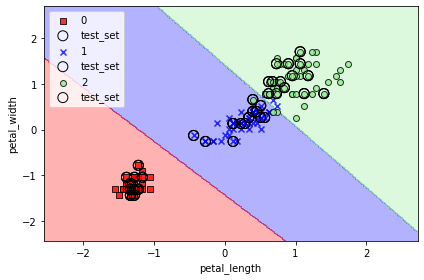

In [34]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=100, random_state=1)
svm.fit(X_train_std, y_train)
plot_decision_region(X_combined_std, y_combined, classifier=svm,test_idx=range(105,150))
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.legend()
plt.tight_layout()
plt.show()

非線形SVM

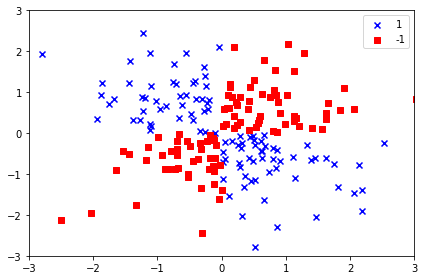

In [35]:
np.random.seed(1)
X_xor = np.random.randn(200,2)
y_xor = np.logical_xor(X_xor[:,0]>0,X_xor[:,1]>0)
y_xor = np.where(y_xor,1,-1)
plt.scatter(X_xor[y_xor==1, 0], X_xor[y_xor==1,1], c='b',marker='x', label='1')
plt.scatter(X_xor[y_xor==-1, 0], X_xor[y_xor==-1,1], c='r',marker='s', label='-1')
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.legend()
plt.tight_layout()
plt.show()

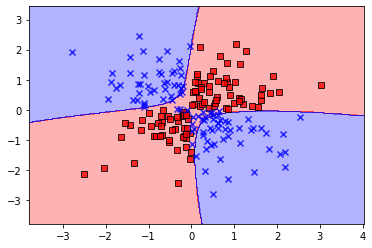

In [36]:
svm = SVC(kernel='rbf',random_state=1,gamma=0.10,C=10.0)
svm.fit(X_xor,y_xor)
plot_decision_region(X_xor, y_xor, classifier=svm)
plt.show()

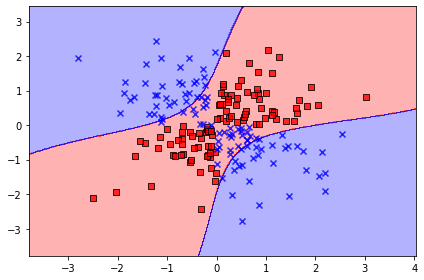

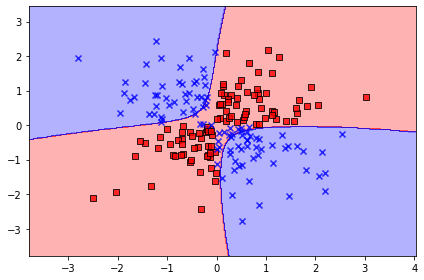

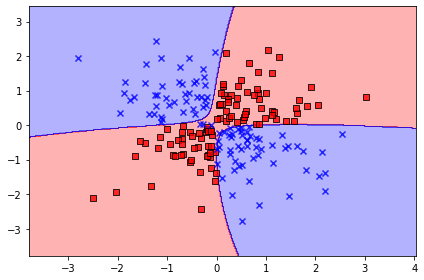

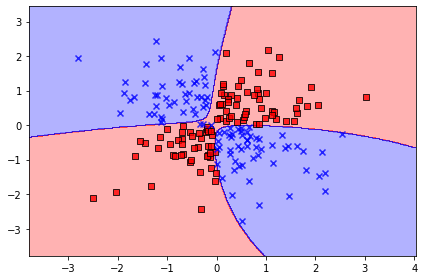

In [37]:
c_params = [1.0, 10.0, 100.0, 1000.0]
for i , c in enumerate(c_params):
  svm = SVC(kernel='rbf',random_state=1,gamma=0.10,C=c)
  svm.fit(X_xor,y_xor)
  plot_decision_region(X_xor, y_xor, classifier=svm)
  plt.tight_layout()
  plt.show()

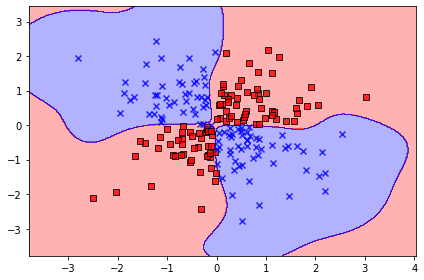

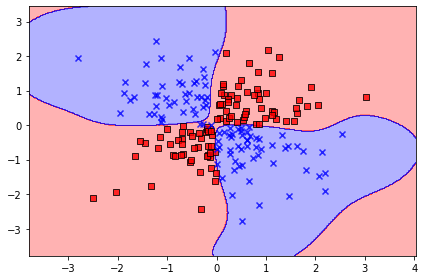

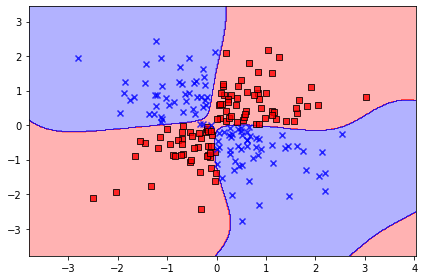

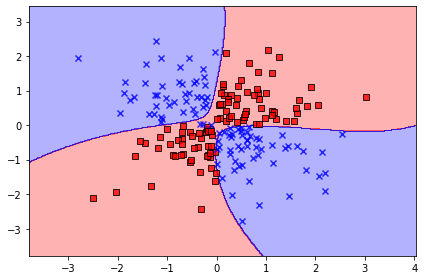

In [38]:
c_params_gamma = [1.0,0.7,0.5,0.2]
for i , c in enumerate(c_params_gamma):
  svm = SVC(kernel='rbf',random_state=1,gamma=c,C=100)
  svm.fit(X_xor,y_xor)
  plot_decision_region(X_xor, y_xor, classifier=svm)
  plt.tight_layout()
  plt.show()

3.6決定木の妙技

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


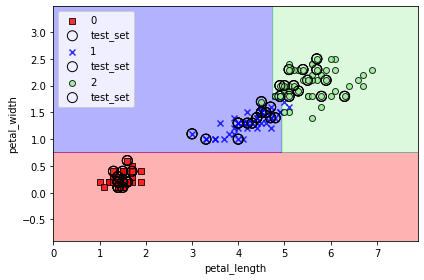

In [43]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
tree_model.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
plot_decision_region(X_combined, y_combined, classifier=tree_model,test_idx=range(105,150))
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.legend()
plt.tight_layout()
plt.show()

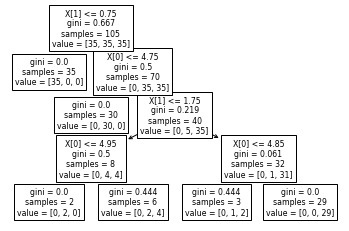

In [44]:
from sklearn import tree
tree.plot_tree(tree_model)
plt.show()

In [ ]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
dot_data = export_graphviz(tree_model, filled=True, rounded=True,
                           class_names=['setona','versicolor','virginica'],
                           feature_names=['petallength','petalwidth'],
                           out_file=None)